In [1]:
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
RANDOM_STATE = 11

Импортируем данные:

In [3]:
X, y = load_iris(return_X_y=True)

In [4]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Бинарная классификация

Рассмотрим бинарную классификацию. Для этого создадим новый бинарный таргет:

In [6]:
y_binary = np.where(y==1, 1, 0)

In [7]:
y_binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
np.unique(y_binary, return_counts=True)

(array([0, 1]), array([100,  50]))

Представителей положительного класса вдвое больше, чем отрицательного - классификация несбалансированная.

Зафиксируем тренировочные и тестовые индексы, указав, что мы хотим стратифицировать наши метки при разбивке, то есть сохранить одинаковый баланс меток в train и test наборах данных:

In [9]:
train_ids, test_ids = train_test_split(range(len(y_binary)), test_size=.3, random_state=RANDOM_STATE, stratify=y_binary)

Проверим, что у нас одинаковый процент положительных меток в трейне и в тесте:

In [10]:
for dataset_ids in [train_ids, test_ids]:
    print(pd.Series(y_binary[dataset_ids]).value_counts(normalize=True))

0    0.666667
1    0.333333
dtype: float64
0    0.666667
1    0.333333
dtype: float64


Распределения меток в наборах данных train и test одинаковое.

## Обучаем логистическую регрессию

Обучаем на тренировочных данных:

In [11]:
clf = LogisticRegression(random_state=RANDOM_STATE)
clf.fit(X[train_ids], y_binary[train_ids])

LogisticRegression(random_state=11)

Найдём предсказания. Можем найти в виде меток классов (метод `predict`), а можем - в виде вероятности пренадлежности экземпляра положительному классу (метод `predict_proba`). Для начала воспользуемся первым методом.

Предсказания найдём сразу на всём наборе данных, а потом отфильтруем по индексам.

In [12]:
y_pred = clf.predict(X)

In [13]:
y_pred[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0])

## Подсчёт метрик

Импортируем все необходимые функции для подсчёта метрик, разберём их ниже.

In [14]:
from sklearn.metrics import (precision_score, 
                             recall_score, 
                             f1_score,
                             confusion_matrix, 
                             classification_report,
                             ConfusionMatrixDisplay)

Найдём матрицу несоответствий (Confusion matrix):

In [15]:
cm = confusion_matrix(y_binary[test_ids], y_pred[test_ids])
cm

array([[29,  1],
       [11,  4]])

По **вертикали** у нас значение **настоящей** метки класса, а по **горизонтали** - **предсказанной**. 
Если забыли - всегда можно найти подсказку в документации метода `confusion_matrix`:
```
Returns
-------
C : ndarray of shape (n_classes, n_classes)
    Confusion matrix whose i-th row and j-th
    column entry indicates the number of
    samples with true label being i-th class
    and predicted label being j-th class.
```

Для отображения матрицы визуально воспользуемся методом `ConfusionMatrixDisplay`.

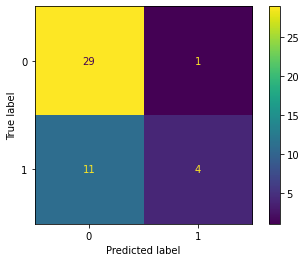

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show();

Метрики находим вызовом функций:

In [17]:
precision_score(y_binary[train_ids], y_pred[train_ids]).round(3)

0.652

У метрик precision, recall, f1 одинаковый интерфейс, потому можем метрики задавать списком и подсчитывать их в цикле.

In [21]:
metrics = [precision_score, recall_score, f1_score]

In [22]:
for dataset_name, dataset_ids in {'train': train_ids, 'test': test_ids}.items():
    print(dataset_name)
    for metric in metrics:
        print(metric.__name__, metric(y_binary[dataset_ids], y_pred[dataset_ids]).round(3))
    print('\n')

train
precision_score 0.652
recall_score 0.429
f1_score 0.517


test
precision_score 0.8
recall_score 0.267
f1_score 0.4




Также сам классификатор имеет `score` - это accuracy.

In [23]:
clf.score(X, y)

0.4533333333333333

Есть возможность вывести несколько метрик одной функцией:

In [24]:
for dataset_ids in [train_ids, test_ids]:
    print(classification_report(y_binary[dataset_ids], y_pred[dataset_ids]))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        70
           1       0.65      0.43      0.52        35

    accuracy                           0.73       105
   macro avg       0.70      0.66      0.67       105
weighted avg       0.72      0.73      0.72       105

              precision    recall  f1-score   support

           0       0.72      0.97      0.83        30
           1       0.80      0.27      0.40        15

    accuracy                           0.73        45
   macro avg       0.76      0.62      0.61        45
weighted avg       0.75      0.73      0.69        45



Выбор метрики зависит от задачи. Если не знаем, какой результат нам более приоритетно избегать: ложноположиельный или ложноорицательный, используем F1.

Тогда в таблице нас интересует значение f1-score для класса 1 для тренировочных и тестовых данных.

## Пользовательский порог

Если мы хотим установить свой порог определения классов 1 и 0, то предсказания надо получать методом `predict_proba`.

In [25]:
y_pred_prob = clf.predict_proba(X)

Метод возвращает несколько колонок: вероятность пренадлежности экземпляра каждому классу.

In [26]:
y_pred_prob[:5]

array([[0.87062397, 0.12937603],
       [0.70685516, 0.29314484],
       [0.78649679, 0.21350321],
       [0.73016414, 0.26983586],
       [0.89036045, 0.10963955]])

Проверим, что в каждой строке сумма 1.

In [27]:
np.all(y_pred_prob.sum(axis=1)==1)

True

Посмотрим, как распределены предсказанные значения. Это может нам помочь найти оптимальный порог для определения положительных и отрицательных меток.

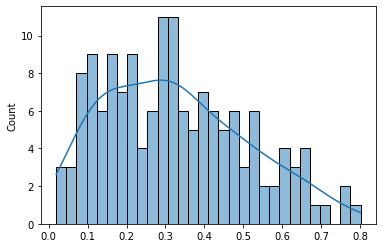

In [28]:
sns.histplot(y_pred_prob[:,1], bins=30, kde=True);

In [29]:
THRESHOLD = 0.3

In [31]:
y_pred = np.where(y_pred_prob[:,1] >= THRESHOLD, 1, 0)

Найдём метрики:

In [32]:
for dataset_ids in [train_ids, test_ids]:
    print(classification_report(y_binary[dataset_ids], y_pred[dataset_ids]))

              precision    recall  f1-score   support

           0       0.94      0.66      0.77        70
           1       0.57      0.91      0.70        35

    accuracy                           0.74       105
   macro avg       0.76      0.79      0.74       105
weighted avg       0.82      0.74      0.75       105

              precision    recall  f1-score   support

           0       0.83      0.63      0.72        30
           1       0.50      0.73      0.59        15

    accuracy                           0.67        45
   macro avg       0.66      0.68      0.66        45
weighted avg       0.72      0.67      0.68        45



Значение f1-score для класса 1 и для тренировочных, и для тестовых данных улучшилось, значит мы выбрали удачный порог классификации.

### ROC curve

Для позитивного класса найдём ROC кривую и площадь под ней.

In [44]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_binary[test_ids], y_pred_prob[test_ids][:, 1])
roc_auc = auc(fpr, tpr)

In [50]:
def plot_roc(fpr, tpr, roc_auc):
    plt.figure()
    lw = 2 # linewidth - ширина линии на графике
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

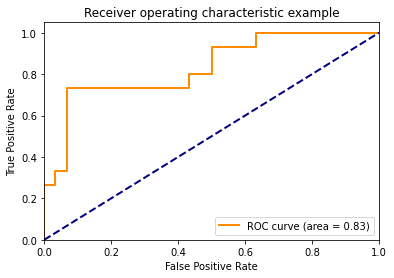

In [51]:
plot_roc(fpr, tpr, roc_auc)

## Мультиклассовая классификация

Используем оригинальный таргет и построим мультиклассовую классификацию.

In [59]:
clf = LogisticRegression(random_state=RANDOM_STATE, multi_class='ovr')
clf.fit(X[train_ids], y[train_ids])

LogisticRegression(multi_class='ovr', random_state=11)

In [61]:
y_pred = clf.predict(X)
y_pred_prob = clf.predict_proba(X)
score = clf.score(X, y)

Выведем классификационный отчёт:

In [62]:
for dataset_ids in [train_ids, test_ids]:
    print(classification_report(y[dataset_ids], y_pred[dataset_ids]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.94      0.89      0.91        35
           2       0.89      0.94      0.92        36

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



Можем также при подсчтёте отдельных метрик (precision, recall, f1) задавать желаемое усреднение.

In [63]:
precision_score(y[test_ids], y_pred[test_ids], average='macro')

0.9583333333333334

In [64]:
precision_score(y[test_ids], y_pred[test_ids], average='micro')

0.9555555555555556